In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

import sys,os
sys.path.append('../')
from collections import Counter

from copy import copy,deepcopy

import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

from tqdm import tqdm_notebook as tqdm

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,RobustScaler
from sklearn import preprocessing

from efcm.cluster import EFCM_LS1

### Load data

In [ ]:
### Data merge scaled
#dataset_names = ['dataset_01_scaled', 'dataset_02_scaled', 'dataset_03_scaled']
#data_01 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[0], 'csv'])))
#data_02 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[1], 'csv'])))
#data_03 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[2], 'csv'])))

In [ ]:
## Data test scaled
#dataset_names = ['dataset_01_scaled_test','dataset_02_scaled_test','dataset_03_scaled_test']
#data_01 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[0], 'csv'])))
#data_02 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[1], 'csv'])))
#data_03 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[2], 'csv'])))

In [3]:
#### Data test Raw
dataset_names =['dataset_01_raw_test','dataset_02_raw_test','dataset_03_raw_test']
 
data_01 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[0], 'csv'])))
data_02 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[1], 'csv'])))
data_03 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[2], 'csv'])))

In [ ]:
### Data test Raw not sorted
#dataset_names =['dataset_01_raw_test_notsort','dataset_02_raw_test_notsort','dataset_03_raw_test_notsort']
# 
#data_01 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[0], 'csv'])))
#data_02 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[1], 'csv'])))
#data_03 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[2], 'csv'])))

In [ ]:
### Data merge Raw
#dataset_names = ['dataset_01_raw_merge','dataset_02_raw_merge','dataset_03_raw_merge']
#data_01 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[0], 'csv'])))
#data_02 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[1], 'csv'])))
#data_03 = pd.read_csv(os.path.join('../input/', '.'.join([dataset_names[2], 'csv'])))

### View data

In [ ]:
data_01.head()

In [ ]:
data_02.head()

In [ ]:
data_03.head()

In [ ]:
print('Shape',data_01.shape,data_02.shape,data_03.shape)

In [4]:
X_data_01 = data_01.drop(columns='Target').values.copy()
y_data_01 = data_01.Target.values.copy()
X_data_02 = data_02.drop(columns='Target').values.copy()
y_data_02 = data_02.Target.values.copy()
X_data_03 = data_03.drop(columns='Target').values.copy()
y_data_03 = data_03.Target.values.copy()

In [5]:
try:
    assert y_data_01.all() == y_data_02.all() ==y_data_03.all()
    y = y_data_01
except:
    print('Target invalid')

### Parâmetros de T_u e T_V no diretório -- ../run_best_params

 - Dataset_01 : T_u=0.9  T_v=30.0
 - Dataset_02 : T_u=1.0  T_v=1000.0
 - Dataset_03 : T_u=5.0  T_v=10.0

### Evaluate

In [26]:
clf = EFCM_LS1(n_cluster=7,theta_u=.9 ,theta_v=30,epsilon=1e-10,tol_iter=150,init='dirichlet')
u = []
epoch = 3 # mudar para 50
model = []
_ = [model.append(deepcopy(clf)) for _ in range(epoch)]
for j in range(epoch):
    model[j].fit(X_data_01) # X_data_01,X_data_02,X_data_03
    print('run:{} loss: {} '.format(j,model[j].loss))
    u.append(model[j].loss)

run:0 loss: 19.891928254285688 
run:1 loss: 19.89767962134102 
run:2 loss: 19.7976709080398 


In [18]:
u = np.array(u)
np.argmin(u),u[np.argmin(u)]

(2, 2289.77789605491)

### Partition Fuzzy Matrix

In [31]:
model[np.argmin(u)].fuzzy_matrix[1000]

array([0.24472228, 0.08146731, 0.06899403, 0.27312644, 0.06927027,
       0.18366668, 0.07875299])

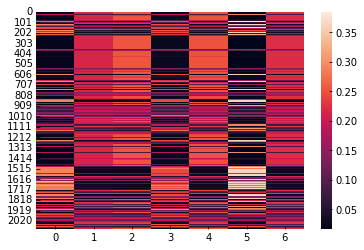

In [33]:
ax = sns.heatmap(model[np.argmin(u)].fuzzy_matrix)
plt.show()

### Matrix V

In [24]:
model[np.argmin(u)].fuzzy_weight_matrix

array([[3.25328547e-16, 3.25328547e-16, 3.25328547e-16, 3.25328547e-16,
        7.19951385e-12, 3.25328547e-16, 4.16755801e-12, 3.25328547e-16,
        8.85459487e-01, 1.14540513e-01],
       [3.25244045e-16, 3.25244045e-16, 3.25244045e-16, 3.25244045e-16,
        6.42847537e-12, 3.25244045e-16, 2.82401347e-12, 3.25244045e-16,
        8.85758181e-01, 1.14241819e-01],
       [3.29885784e-16, 3.29885784e-16, 3.29885784e-16, 3.29885784e-16,
        1.65698283e-12, 3.29885784e-16, 4.21753785e-13, 3.29885784e-16,
        8.91674459e-01, 1.08325541e-01],
       [3.24796525e-16, 3.24796525e-16, 3.24796525e-16, 3.24796525e-16,
        7.04384070e-12, 3.24796525e-16, 3.88940148e-12, 3.24796525e-16,
        8.85531263e-01, 1.14468737e-01],
       [3.32131033e-16, 3.32131033e-16, 3.32131033e-16, 3.32131033e-16,
        2.94217236e-12, 3.32131033e-16, 6.01386865e-13, 3.32131033e-16,
        8.86266052e-01, 1.13733948e-01],
       [3.40922229e-16, 3.40922229e-16, 3.40922229e-16, 3.40922229e-16,
   

### Features importance

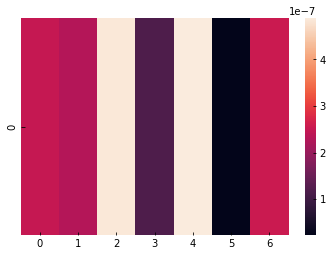

In [39]:
ax = sns.heatmap(model[np.argmin(u)].fuzzy_weight_matrix.T[4:5])
plt.show()

### Labels

In [ ]:
model[np.argmin(u)].labels_

In [29]:
Counter(model[np.argmin(u)].labels_)

Counter({6: 166, 2: 997, 5: 403, 4: 61, 1: 81, 3: 92, 0: 300})

### Loss History

In [ ]:
# plot
plt.plot(model[np.argmin(u)].loss_history)